In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
letter_data = pd.read_csv('./letterdata.csv')
letter_data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
letter_data.shape

(20000, 17)

<Axes: xlabel='count', ylabel='letter'>

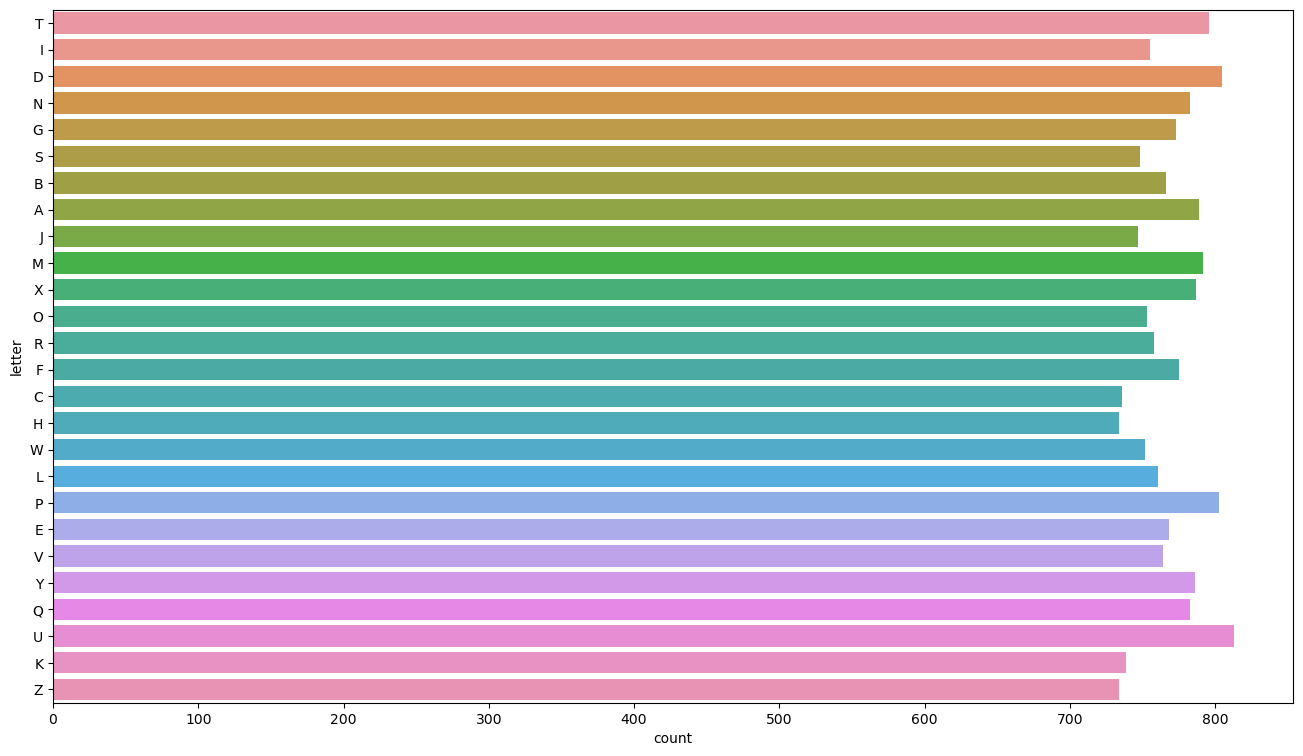

In [6]:
plt.figure(figsize=(16,9))
sns.countplot(y=letter_data['letter'])

In [9]:
y = letter_data['letter']
X = letter_data.drop(['letter'],axis=1)

In [26]:
df = letter_data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
clf = RandomForestClassifier(random_state=0, n_estimators=10)

In [14]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
y_pred = clf.predict(X_test)

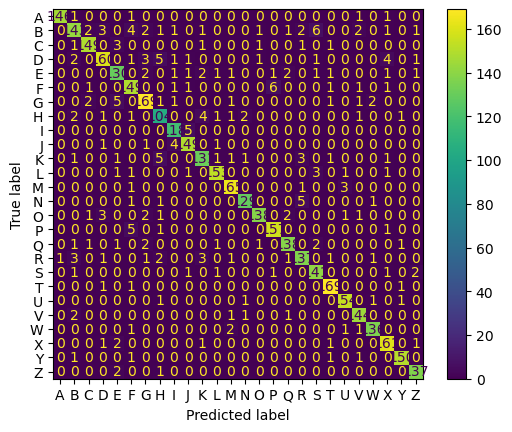

In [25]:
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [21]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           A       0.99      0.97      0.98       150
           B       0.91      0.84      0.87       171
           C       0.96      0.95      0.95       157
           D       0.94      0.89      0.91       180
           E       0.90      0.90      0.90       145
           F       0.89      0.93      0.91       161
           G       0.93      0.92      0.93       183
           H       0.85      0.88      0.86       118
           I       0.93      0.96      0.94       123
           J       0.94      0.96      0.95       156
           K       0.92      0.90      0.91       146
           L       0.96      0.95      0.96       161
           M       0.95      0.97      0.96       170
           N       0.96      0.94      0.95       137
           O       0.97      0.93      0.95       149
           P       0.95      0.96      0.95       164
           Q       0.95      0.93      0.94       148
           R       0.92    

In [24]:
accuracy_score(y_pred, y_test)

0.93925

In [33]:
new = pd.concat([X.iloc[356:357,:],
                X.iloc[4567:4568,:],
                X.iloc[11565:11566,:]])

In [34]:
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
356,3,8,4,6,2,7,7,14,2,5,6,8,5,8,0,8
4567,6,9,8,7,8,9,5,7,4,7,5,7,6,7,8,9
11565,3,3,5,2,2,7,6,2,7,10,6,10,4,7,3,8


In [35]:
clf.predict(new)

array(['N', 'R', 'K'], dtype=object)